# Parabolas and Where to Find Them

A regression back to High School math, with the goal of understanding how to fit a 2D rotated parabola.


In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np

## 1D Parabola

In [2]:
# create some x axis data
xs = np.linspace(-20, 20)

In [3]:
xs

array([-20.        , -19.18367347, -18.36734694, -17.55102041,
       -16.73469388, -15.91836735, -15.10204082, -14.28571429,
       -13.46938776, -12.65306122, -11.83673469, -11.02040816,
       -10.20408163,  -9.3877551 ,  -8.57142857,  -7.75510204,
        -6.93877551,  -6.12244898,  -5.30612245,  -4.48979592,
        -3.67346939,  -2.85714286,  -2.04081633,  -1.2244898 ,
        -0.40816327,   0.40816327,   1.2244898 ,   2.04081633,
         2.85714286,   3.67346939,   4.48979592,   5.30612245,
         6.12244898,   6.93877551,   7.75510204,   8.57142857,
         9.3877551 ,  10.20408163,  11.02040816,  11.83673469,
        12.65306122,  13.46938776,  14.28571429,  15.10204082,
        15.91836735,  16.73469388,  17.55102041,  18.36734694,
        19.18367347,  20.        ])

In [4]:
# and our y axis data uses the equation for a parabola
f = 5.
zs = (1 / (4.*f))*(xs)**2


In [5]:
# make sure it looks right!
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, zs)

<IPython.core.display.Javascript object>

In [6]:
# now apply some vertices and watch the displacement happen
v1 = 10.
v2 = 10.
zs2 = ((1/(4.*f))*(xs - v1)**2) + v2

In [7]:
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, zs2)

<IPython.core.display.Javascript object>

## 2D Parabola

In [8]:
# now we need to create x and y axis data
ys = np.linspace(-20., 20.)
xs2d, ys2d = np.meshgrid(xs, ys)
# and here we apply a 2D parabola equation
zs2d = (1 / (4.*f))*(xs2d)**2 +  (1 / (4.*f))*(ys2d)**2
zs2d.shape

(50, 50)

In [9]:
# make sure this 2D parabola makes sense
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(zs2d)
cbar = fig.colorbar(cax)

<IPython.core.display.Javascript object>

In [10]:
# surface plot is even more informative
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, zs2d)

<IPython.core.display.Javascript object>

In [11]:
# now let's apply the equation for a 2D Parabola but with vertices (displacement)
v2 = 10.
v1x = v1y = 7.5
zs2d2 = (1 / (4.*f))*(xs2d - v1x)**2 + (1 / (4.*f))*(ys2d - v1y)**2 + v2;

In [12]:
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(zs2d2)
fig.colorbar(cax)

<IPython.core.display.Javascript object>

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, zs2d2)

<IPython.core.display.Javascript object>

## Simple 1D Parabola Fit

In [14]:
# now create a simple 1 D parabola but with added noise
focal = 5.
data1D = (1 / (4.*focal))*(xs)**2 + (np.random.rand(50))
data1D.shape

(50,)

In [15]:
# make sure it looks right
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, data1D, 'o', xs, data1D)

<IPython.core.display.Javascript object>

In [16]:
# we want to fit this data to the equation of a 1D parabola (NO vertices)
def fun(coeffs, xdata):
    return (1 / (4.*coeffs[0]))*(xdata)**2

In [17]:
# and what we want to minimize is the difference between the function above and our made up data
def errfun(coeffs, xdata, ydata):
    return fun(coeffs, xdata) - ydata

In [18]:
# here we use scipy to fit our data
from scipy.optimize import least_squares
#r = least_squares(errfun, [3.5], args=(xs, data1D), ftol=1e-15)
# we set our inital guess close to the original value of the focus of 5
guess = [3.5]
r = least_squares(errfun, guess, args=(xs, data1D))
#print r
# what's the answer?  Was it able to find an answer?
print r.success
print r.message
print r.nfev
print r.x

# let's see what the fitted data looks like: that is, the application of the fit
# we found from above to the parabola function
fittedFocus = r.x
fittedData = fun([fittedFocus], xs)

# graph the two together to see how close the fit is
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, data1D, 'o', xs, fittedData)


True
`gtol` termination condition is satisfied.
6
[4.79334208]


<IPython.core.display.Javascript object>

## Simple 2D Parabola Fitting


In [19]:
# same thing as above, but in 2D - make some noisy data
xs2d, ys2d = np.meshgrid(xs, ys)
data2D = (1 / (4.*f))*(xs2d)**2 +  (1 / (4.*f))*(ys2d)**2 + np.random.rand(50, 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, data2D)


<IPython.core.display.Javascript object>

In [20]:
def fun(coeffs, xdata, ydata):
    return (1 / (4.*coeffs[0]))*(xdata)**2 + (1 / (4.*coeffs[0]))*(ydata)**2

In [21]:
def errfun(coeffs, xdata, ydata, zdata):
    return fun(coeffs, xdata, ydata) - zdata

In [22]:
# find a fit for the 2D data
r = least_squares(errfun, [3.5], args=(xs2d.flatten(), ys2d.flatten(), data2D.flatten()))
#print r
print r.success
print r.message
print r.nfev
print r.x

# take a look at the fitted data
fittedFocus = r.x
fittedData = fun([fittedFocus], xs2d, ys2d)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, fittedData)

True
Both `ftol` and `xtol` termination conditions are satisfied.
6
[4.87623453]


<IPython.core.display.Javascript object>

In [23]:
# from the graphs above, the fit looks good, but lets find the difference
# between the fit and the original data anyways
residuals = fittedData - data2D
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(residuals)
fig.colorbar(cax)


<IPython.core.display.Javascript object>

## 2D Parabola Fitting with vertices

In [24]:
# Same thing as above, just our parabola function for creating the noisy data,
# and the function we are fitting to, just get a little more complicated
xs2d, ys2d = np.meshgrid(xs, ys)
v1x = 3.0
v1y = 4.0
v2 = 6.0
data2D = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + v2 + np.random.rand(50, 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, data2D)

<IPython.core.display.Javascript object>

In [25]:
def fun(coeffs, xdata, ydata):
    f = coeffs[0]
    v1x = coeffs[1]
    v1y = coeffs[2]
    v2 = coeffs[3]
    return (1 / (4.*f))*(xdata - v1x)**2 + (1 / (4.*f))*(ydata - v1y)**2 + v2

In [26]:
def errfun(coeffs, xdata, ydata, zdata):
    return fun(coeffs, xdata, ydata) - zdata

In [27]:
# see if we come up with a fit, using a guess pretty close the original params that
# were used to create the data
guess = [3.5, 2.0, 2.0, 2.0]
r = least_squares(errfun, guess, args=(xs2d.flatten(), ys2d.flatten(), data2D.flatten()))
#print r
print r.success
print r.message
print r.nfev
print r.x

True
Both `ftol` and `xtol` termination conditions are satisfied.
6
[5.00075039 3.00722938 4.00081185 6.49604604]


In [28]:
# take a look at the fitted data
fittedFocus = r.x
fittedData = fun(r.x, xs2d, ys2d)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, fittedData)

<IPython.core.display.Javascript object>

In [29]:
# and again, make sure the difference between the fit and the original data is small
residuals = fittedData - data2D
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(residuals)
cbar = fig.colorbar(cax)

<IPython.core.display.Javascript object>

In [30]:
np.max(residuals)

0.5037251885415799

## 2D Rotated Parabola

Now things get complicated.  Let's take our 2D parabola and rotate it.

In [31]:
xs2d, ys2d = np.meshgrid(xs, ys)
# first, don't use an displacement
v1x = 0.0
v1y = 0.0
v2 = 0.0
# equation for a 2D parabola
data2d = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + v2


In [32]:
# make sure the original data looks sensible
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, data2d)
plt.xlabel("x")
plt.ylabel("y")


<IPython.core.display.Javascript object>

Text(0.5,0,'y')

In [33]:
# now import the rotation functions we'll need
from rotate import *


In [34]:
# actually rotate the data!

qtrTurn = np.pi / 2
xs2dRot, ys2dRot, zs2dRot = rotateXY(xs2d, ys2d, data2d, qtrTurn, qtrTurn)

In [35]:
# now view this to make sure the rotation looks right!
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2dRot, ys2dRot, zs2dRot)
plt.xlabel("x")
plt.ylabel("y")

<IPython.core.display.Javascript object>

Text(0.5,0,'y')

## Fit 2D Rotated Parabola

Now we will continue following this simple logic, and see how it breaks down, and what we need to do to fix it.

<IPython.core.display.Javascript object>


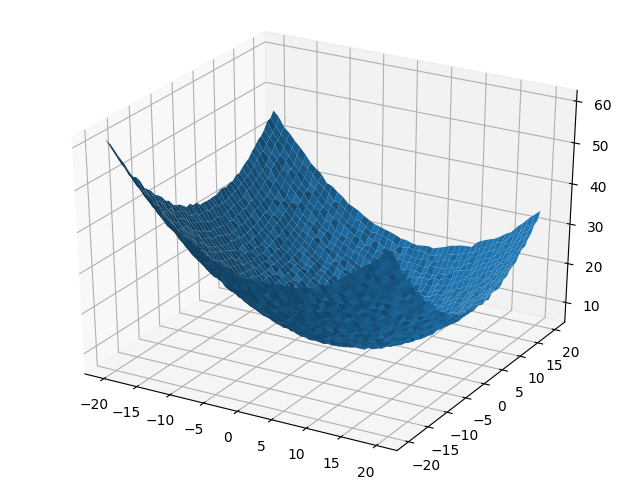

In [58]:
# first, make sure we can fit data taking rotation into account, but not actually rotating it
xs2d, ys2d = np.meshgrid(xs, ys)
v1x = 3.0
v1y = 4.0
v2 = 6.0
xRot = 0.
yRot = 0.
zs2d = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + v2 + np.random.rand(50, 50)
xdata, ydata, zdata = rotateXY(xs2d, ys2d, zs2d, xRot, yRot)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xdata, ydata, zdata)

In [40]:
# the equation we are fitting for now also does a rotation
def fun(coeffs, xdata, ydata):
    f = coeffs[0]
    v1x = coeffs[1]
    v1y = coeffs[2]
    v2 = coeffs[3]
    aroundX = coeffs[4]
    aroundY = coeffs[5]
    zdata =  (1 / (4.*f))*(xdata - v1x)**2 + (1 / (4.*f))*(ydata - v1y)**2 + (2*v2)
    _, _, zdataRot = rotateXY(xdata, ydata, zdata, aroundX, aroundY)
    return zdataRot


In [41]:
def errfun(coeffs, xdata, ydata, zdata):
    return fun(coeffs, xdata, ydata) - zdata

In [42]:
# our initial guess is close for the displacement, and right on for the rotation
coeffs = [3.5, 2.01, 2.01, 2.01, 0.0, 0.0]
r = least_squares(errfun, coeffs, args=(xs2d.flatten(), ys2d.flatten(), data2D.flatten()))
#print r
print r.success
print r.message
print r.nfev
print r.x

True
`ftol` termination condition is satisfied.
20
[ 4.29697869  4.17951179 -0.97911747  3.97265657 -0.52119651 -0.13557099]


<IPython.core.display.Javascript object>


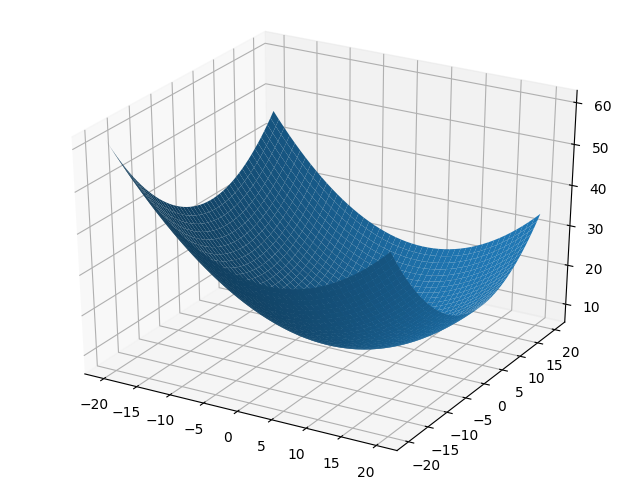

In [43]:
# this doesn't look right!  But let's try to plot the fitted data anyways

fittedData = fun(r.x, xs2d, ys2d)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, fittedData)

<IPython.core.display.Javascript object>


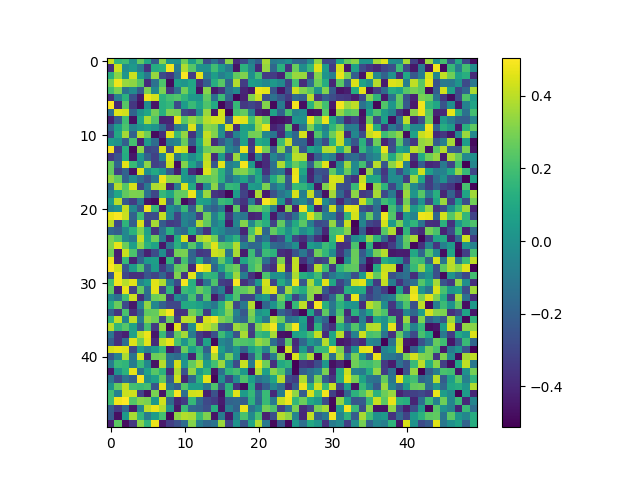

In [45]:
# but that looks just like our data!  Huh?  What do the residuals look like?
residuals = fittedData - zs2d
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(residuals)
cbar = fig.colorbar(cax)

In [44]:
# we are obviously doing something very wrong.  So let's revisit this.


## Properly Fitting 2D Rotated Parabola

In [46]:
# we'll go back to the funtion we are fitting for to just be a parabola
from scipy.optimize import least_squares

def fun(coeffs, xdata, ydata):
    f = coeffs[0]
    v1x = coeffs[1]
    v1y = coeffs[2]
    v2 = coeffs[3]
    #aroundX = coeffs[4]
    #aroundY = coeffs[5]
    return  (1 / (4.*f))*(xdata - v1x)**2 + (1 / (4.*f))*(ydata - v1y)**2 + v2

# and we will define a new errfun to fit this data
def errfun(coeffs, xdata, ydata, zdata):
    
    # rotate the original data first!
    xr, yr, zr = rotateXY(xdata, ydata, zdata, coeffs[4], coeffs[5])
    
    z = fun(coeffs, xdata, ydata)
    # now what we are trying to minimize is the difference between the rotated 
    # input data and a parabola in the same frame
    return zr - z

In [55]:
#coeffs = [3.5, 2.01, 2.01, 2.01, 0.0, 0.0]
coeffs = [f, v1x, v1y, v2, 0.0, 0.0]
inf = np.inf
pi2 = 2*np.pi
b1 = [-inf, -inf, -inf, -inf, -pi2, -pi2]
b2 = [inf, inf, inf, inf, pi2, pi2]
bounds = (b1, b2)
r = least_squares(errfun, coeffs, args=(xs2d.flatten(), ys2d.flatten(), zdata.flatten()),
                      #bounds=bounds,
                      method='lm',
                      max_nfev=100000,
                  
                      ftol=1e-15,
                      xtol=1e-15)

In [56]:
print r.x

[ 1.59095590e+04  2.78543402e+03 -3.16932246e+04 -1.59058302e+04
  1.48323825e+00  1.56720282e+00]


In [57]:
print r.message

The maximum number of function evaluations is exceeded.
